In [1]:
# sys module

#  third parties module
import sklearn
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.cm as cm
import numpy as np

# local module
from utils import load_data, get_colors

       x      y  cluster
0  26.75  22.15        1
1  29.80  22.15        1
2  31.55  21.10        1
3  27.70  20.85        1
4  29.90  19.95        1


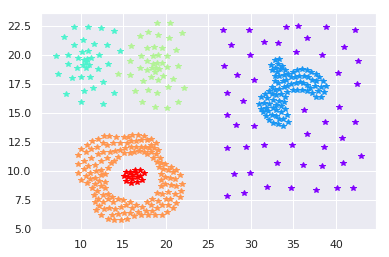

In [14]:
# data obtained from http://cs.joensuu.fi/sipu/datasets/
data = load_data ('compound')
print (data.head (5))
colors = get_colors (len (pd.unique (data['cluster'])))
for cl_idx, cl in enumerate (np.unique (data['cluster'])):
    data_cl = data[ data['cluster'] == cl][['x', 'y']]
    plt.plot (data_cl['x'], data_cl['y'], '*', color=colors[cl_idx])

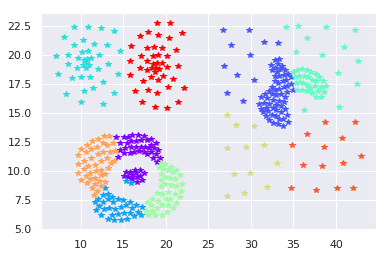

In [15]:
# clustering using K-Means
n_clusters = 10
n_colors = get_colors (n_clusters)
KM = KMeans (n_clusters=n_clusters)
KM.fit (data[['x', 'y']])
data['kmeans_cluster'] = KM.labels_

for cl_idx, cl in enumerate (np.unique (data['kmeans_cluster'])):
    data_cl = data[ data['kmeans_cluster'] == cl][['x', 'y']]
    plt.plot (data_cl['x'], data_cl['y'], '*', color=n_colors[cl_idx])

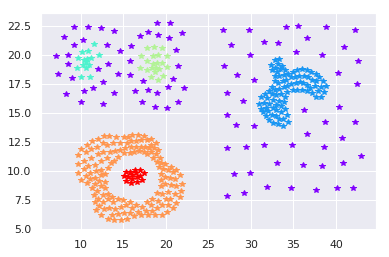

In [17]:
# clustering using K-Means
DB = DBSCAN (eps=1)
DB.fit (data[['x', 'y']])
data['dbscan_cluster'] = DB.labels_

n_colors = get_colors (len (np.unique (DB.labels_)))
for cl_idx, cl in enumerate (np.unique (data['dbscan_cluster'])):
    data_cl = data[ data['dbscan_cluster'] == cl][['x', 'y']]
    plt.plot (data_cl['x'], data_cl['y'], '*', color=n_colors[cl_idx])